In [1]:
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
fm=tf.keras.datasets.fashion_mnist.load_data()
(x_train,y_train),(x_test,y_test)=fm
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,stratify=y_train,random_state=42)

In [4]:
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

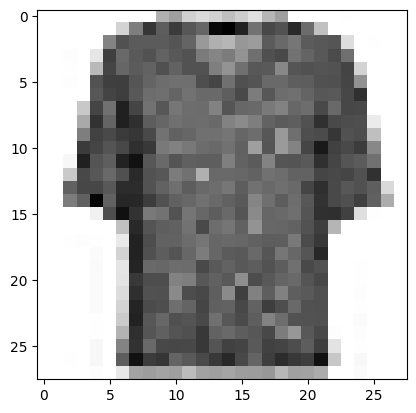

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x_train[200],cmap='binary')
pl.show()

In [6]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
x_train.shape

(54000, 28, 28)

In [8]:
from functools import partial

In [13]:
def model(input_shape):
    MyConv2D=partial(tf.keras.layers.Conv2D,kernel_size=(3,3),strides=(1,1),dilation_rate=(1,1),padding='same',activation='relu',kernel_initializer='he_normal')
    model=tf.keras.Sequential()
    model.add(MyConv2D(filters=64,kernel_size=(7,7),input_shape=input_shape))
    model.add(tf.keras.layers.MaxPool2D())
    model.add(MyConv2D(filters=128))
    model.add(MyConv2D(filters=128))
    model.add(tf.keras.layers.MaxPool2D())
    model.add(MyConv2D(filters=256))
    model.add(MyConv2D(filters=256))
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    model.summary()
    return model

In [14]:
model=model([28,28,1])

C:\Users\sudip\PycharmProjects\pythonProject\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,422,730 (5.43 MB)

 Trainable params: 1,422,730 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
x_train=x_train.reshape([x_train.shape[0],28,28,1])
x_train.shape

(54000, 28, 28, 1)

In [23]:
x_val=x_val.reshape([x_val.shape[0],28,28,1])
x_val.shape

(6000, 28, 28, 1)

In [24]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 242s 140ms/step - accuracy: 0.7883 - loss: 0.5986 - val_accuracy: 0.8890 - val_loss: 0.3227
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 233s 138ms/step - accuracy: 0.8950 - loss: 0.2824 - val_accuracy: 0.9042 - val_loss: 0.2561
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 232s 138ms/step - accuracy: 0.9140 - loss: 0.2329 - val_accuracy: 0.9157 - val_loss: 0.2323
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 232s 138ms/step - accuracy: 0.9266 - loss: 0.1990 - val_accuracy: 0.9162 - val_loss: 0.2306
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 236s 140ms/step - accuracy: 0.9376 - loss: 0.1695 - val_accuracy: 0.9180 - val_loss: 0.2372
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 257s 137ms/step - accuracy: 0.9433 - loss: 0.1527 - val_accuracy: 0.9150 - val_loss: 0.2582
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 245s 145ms/step - accuracy: 0.9497 - loss: 0.1376 - val_accuracy: 0.9250 - val_loss: 0.2294
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 237s 140ms/step - ac

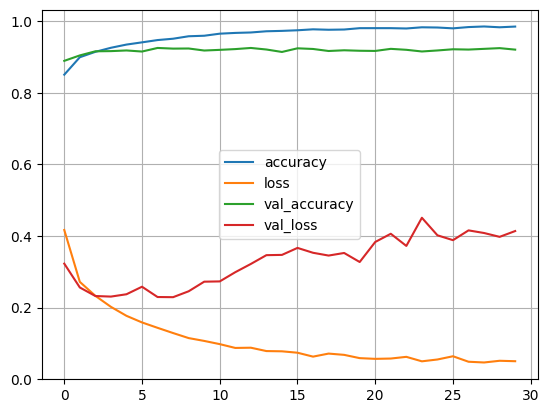

In [25]:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)
pl.show()

In [26]:
model.save('my_fashion_mnist_cnn.keras')